<a href="https://colab.research.google.com/github/JinbiaoZhu/xLM_Learning_and_Employment/blob/main/CH01_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

toy_corpus= ["the fat cat sat on the mat",
             "the big cat slept",
             "the dog chased a cat"]
vectorizer=TfidfVectorizer(use_idf=True)

corpus_tfidf=vectorizer.fit_transform(toy_corpus)

print(f"The vocabulary size is {len(vectorizer.vocabulary_.keys())} ")
print(f"The document-term matrix shape is {corpus_tfidf.shape}")

df=pd.DataFrame(np.round(corpus_tfidf.toarray(),2))
df.columns=vectorizer.get_feature_names_out()
df

The vocabulary size is 10 
The document-term matrix shape is (3, 10)


,big,cat,chased,dog,fat,mat,on,sat,slept,the
0,0.00,0.25,0.00,0.00,0.42,0.42,0.42,0.42,0.00,0.49
1,0.61,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.61,0.36
2,0.00,0.36,0.61,0.61,0.00,0.00,0.00,0.00,0.00,0.36


## Classification

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
labels= [0,1,0]
clf =  SVC()
clf.fit(df.to_numpy(), labels)
clf.predict(df.to_numpy())

array([0, 1, 0])

In [ ]:
clf.predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([0, 1, 0])

# Building a LM Model
Once we prepared our corpus above, we are ready to start training Maximum Likelihood Estimator (MLE) as a Language Model.

## Training a bigram LM

In [ ]:
!pip install nltk==3.5.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434680 sha256=d3805916340164d5cca094701be59edeb291aec02ee0fcbf6d0fa1c1d0fafdca
  Stored in directory: /root/.cache/pip/wheels/35/ab/82/f9667f6f884d272670a15382599a9c753a1dfdc83f7412e37d
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [ ]:
import nltk
from nltk.corpus import gutenberg
from nltk.lm import MLE
from nltk.lm.preprocessing import padded_everygram_pipeline

nltk.download('gutenberg')
nltk.download('punkt')
macbeth = gutenberg.sents('shakespeare-macbeth.txt')

model, vocab = padded_everygram_pipeline(2, macbeth)
lm=MLE(2)
lm.fit(model,vocab)
print(list(lm.vocab)[:40])
print(f"The number of words is {len(lm.vocab)}")
model

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['<s>', '[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']', '</s>', 'Actus', 'Primus', '.', 'Scoena', 'Prima', 'Thunder', 'and', 'Lightning', 'Enter', 'three', 'Witches', '1', 'When', 'shall', 'we', 'meet', 'againe', '?', 'In', ',', 'or', 'in', 'Raine', '2', 'the', 'Hurley', '-', 'burley']
The number of words is 4020


<generator object padded_everygram_pipeline.<locals>.<genexpr> at 0x795dcf3dbf40>

In [ ]:
print(macbeth[42])

['So', 'well', 'thy', 'words', 'become', 'thee', ',', 'as', 'thy', 'wounds', ',', 'They', 'smack', 'of', 'Honor', 'both', ':', 'Goe', 'get', 'him', 'Surgeons', '.']


## See what LM learned

Here is a list of what the language model learded so far

In [ ]:
print(f"The frequency of the term 'Macbeth' is {lm.counts['Macbeth']}")
print(f"The language model probability score of 'Macbeth' is {lm.score('Macbeth')}")
print(f"The number of times 'Macbeth' follows 'Enter' is {lm.counts[['Enter']]['Macbeth']} ")
print(f"P(Macbeth | Enter) is {lm.score('Macbeth', ['Enter'])}")
print(f"P(shaking | for) is {lm.score('shaking', ['for'])}")

The frequency of the term 'Macbeth' is 61
The language model probability score of 'Macbeth' is 0.0022631149365585812
The number of times 'Macbeth' follows 'Enter' is 15 
P(Macbeth | Enter) is 0.1875
P(shaking | for) is 0.012195121951219513


## Language Generation with LM

To generate one word

In [ ]:
lm.generate(1, random_seed=42)

'done'

To generate a sentence of 7 words length

In [ ]:
print(lm.generate(7, random_seed=42))

['done', ',', 'Not', 'for', 'thee', 'in', 'this']


To generate 10 words starting with \<s>

# Word Embeddings Training

In [ ]:
!pip install pillow gensim

In [ ]:
print(len(macbeth))
macbeth

1907


[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=macbeth, vector_size=100, window= 4, min_count=10, workers=4)

In [ ]:
model.wv.similar_by_word('then',10)

[('of', 0.9994213581085205),
 ('I', 0.9994018077850342),
 ('our', 0.9993889331817627),
 (':', 0.9993798732757568),
 ('is', 0.9993731379508972),
 ('that', 0.9993604421615601),
 ('shall', 0.9993601441383362),
 ('his', 0.9993525147438049),
 ('vpon', 0.9993455410003662),
 ('but', 0.999344527721405)]

In [ ]:
model.wv['did'] # get numpy vector of word 'Macbeth'

array([-1.65409282e-01,  2.08966494e-01,  4.59250621e-02, -9.28780735e-02,
        5.08662723e-02, -3.22586656e-01,  2.25984320e-01,  4.46586221e-01,
       -2.60964751e-01, -1.60414457e-01,  5.03907904e-05, -2.20648989e-01,
        8.31875131e-02,  8.34502652e-03,  9.26640853e-02, -1.15007482e-01,
        1.82311788e-01, -2.27899820e-01, -2.29031444e-01, -4.76569146e-01,
        7.75815770e-02,  1.30769953e-01,  1.61633074e-01, -1.60437167e-01,
       -4.25415486e-02,  4.33476344e-02,  7.66398385e-02, -1.38070613e-01,
       -2.81556278e-01,  2.51685493e-02,  1.87338144e-01, -1.83947489e-01,
        1.73775554e-01, -1.86825305e-01, -2.02901155e-01,  3.01718265e-01,
        6.71446249e-02, -2.27536902e-01, -1.54605463e-01, -3.21234614e-01,
       -1.03909284e-01, -1.52094766e-01, -1.26169557e-02, -4.76921350e-02,
        2.78993607e-01, -8.37466866e-03, -1.57609984e-01, -6.09262697e-02,
        7.63451681e-02,  5.55636697e-02,  1.21819504e-01, -9.12317038e-02,
       -1.65201500e-01, -

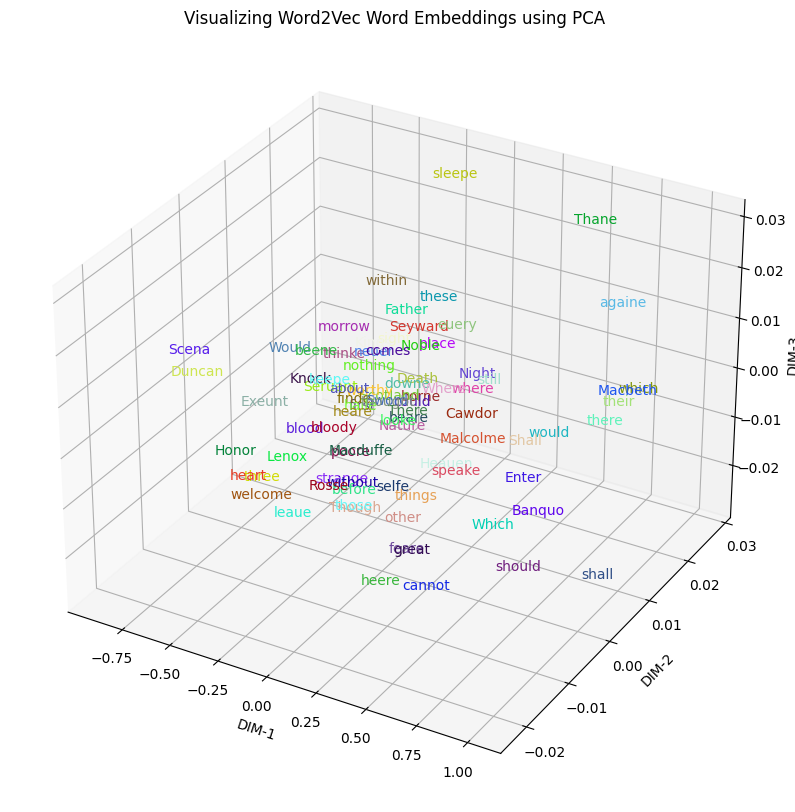

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random
import numpy as np

np.random.seed(42)
words=list([e for e in model.wv.index_to_key if len(e)>4]) # plot words longer than 4
random.shuffle(words)
words3d = PCA(n_components=3, random_state=42).fit_transform(model.wv[words[:100]])

def plotWords3D(vecs, words, title):
    """
        Parameters
        ----------
        vecs : numpy-array
            Transformed 3D array either by PCA or other techniques
        words: a list of word
            the word list to be mapped
        title: str
            The title of plot
        """
    fig = plt.figure(figsize=(14,10))
    ax = fig.add_subplot(projection = '3d')
    for w, vec in zip(words, vecs):
        ax.text(vec[0],vec[1],vec[2], w, color=np.random.rand(3,))
    ax.set_xlim(min(vecs[:,0]), max(vecs[:,0]))
    ax.set_ylim(min(vecs[:,1]), max(vecs[:,1]))
    ax.set_zlim(min(vecs[:,2]), max(vecs[:,2]))
    ax.set_xlabel('DIM-1')
    ax.set_ylabel('DIM-2')
    ax.set_zlabel('DIM-3')
    plt.title(title)
    plt.show()
plotWords3D(words3d, words, "Visualizing Word2Vec Word Embeddings using PCA")

## FastText

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199774 sha256=88583b21a259a93afcf069a0c804d9a1b2da966b15e5d9dc06f162f5fae51b61
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
#Parameters min_n and max_n take control the lengths of character ngrams.
#If max_n is set to 0, no character ngrams are used, and the model turns out to be Word2Vec.

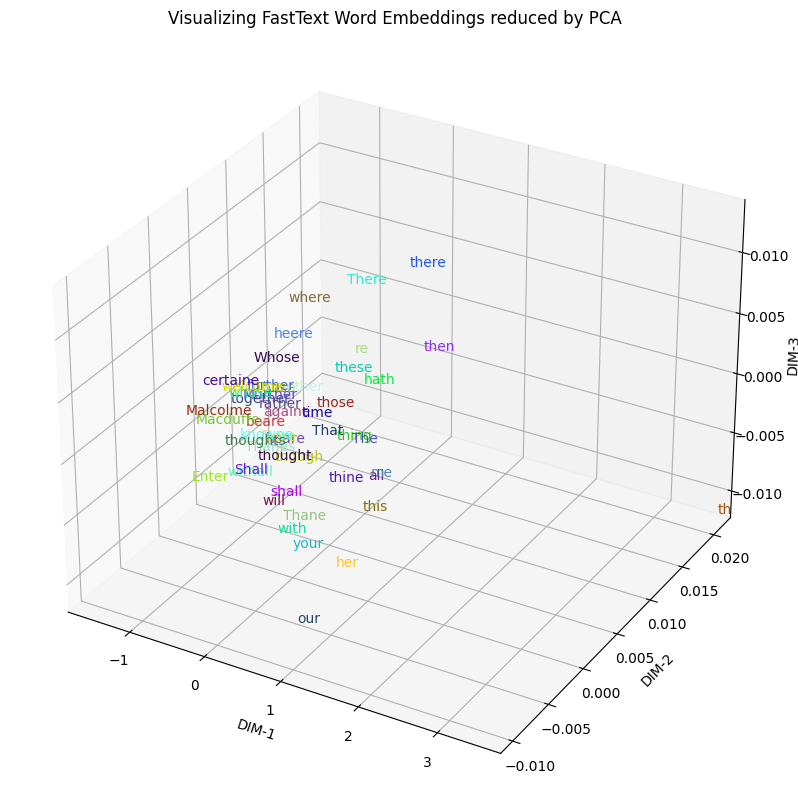

In [ ]:
from gensim.models import FastText
model = FastText(sentences=macbeth, vector_size=100, window=5, min_count=5,  workers=4, word_ngrams=1)
#min_n: min length of char ngrams (Default 3)
#max_n: max length of char ngrams (Default 6)

np.random.seed(42)
words=[w[0] for w in model.wv.similar_by_word("Macbeth",50)]
words3d = PCA(n_components=3, random_state=42).fit_transform(model.wv[words])
plotWords3D(words3d, words, "Visualizing FastText Word Embeddings reduced by PCA")

In [ ]:
## Glove

In [ ]:
import gensim.downloader as api
info = api.info()  # show info about available models/datasets
model = api.load("glove-twitter-25")  # download the model and return as object ready for use

[==================================================] 100.0% 104.8/104.8MB downloaded


In [ ]:
model.most_similar("java")

[('drupal', 0.8857485055923462),
 ('linux', 0.8667981028556824),
 ('electronic', 0.8582332134246826),
 ('adobe', 0.8580152988433838),
 ('developer', 0.8561978936195374),
 ('server', 0.8490769267082214),
 ('javascript', 0.8466134667396545),
 ('osx', 0.8394510746002197),
 ('enterprise', 0.8377523422241211),
 ('software', 0.8366124629974365)]

# LSTM Training

In [ ]:
import numpy as np
import tensorflow as tf
print(tf.version.VERSION)

2.15.0


In [ ]:
!wget https://dl.fbaipublicfiles.com/glue/data/SST-2.zip
!unzip SST-2.zip

--2023-12-17 11:42:52--  https://dl.fbaipublicfiles.com/glue/data/SST-2.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.33, 13.227.219.59, 13.227.219.10, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7439277 (7.1M) [application/zip]
Saving to: ‘SST-2.zip’

SST-2.zip           100%[===================>]   7.09M  --.-KB/s    in 0.1s    

2023-12-17 11:42:52 (57.2 MB/s) - ‘SST-2.zip’ saved [7439277/7439277]

Archive:  SST-2.zip
   creating: SST-2/
  inflating: SST-2/dev.tsv           
   creating: SST-2/original/
  inflating: SST-2/original/README.txt  
  inflating: SST-2/original/SOStr.txt  
  inflating: SST-2/original/STree.txt  
  inflating: SST-2/original/datasetSentences.txt  
  inflating: SST-2/original/datasetSplit.txt  
  inflating: SST-2/original/dictionary.txt  
  inflating: SST-2/original/original_rt_snippets.txt  
  inflating: SST-2/original/s

In [ ]:
import pandas as pd
df=pd.read_csv('SST-2/train.tsv',sep="\t")
sentences=df.sentence
labels=df.label

In [ ]:
df.head(10)

,sentence,label
0,hide new secretions from the parental units,0
1,"contains no wit , only labored gags",0
2,that loves its characters and communicates som...,1
3,remains utterly satisfied to remain the same t...,0
4,on the worst revenge-of-the-nerds clichés the ...,0
5,that 's far too tragic to merit such superfici...,0
6,demonstrates that the director of such hollywo...,1
7,of saucy,1
8,a depressed fifteen-year-old 's suicidal poetry,0
9,are more deeply thought through than in most `...,1


In [ ]:
max_sen_len=max([len(s.split()) for s in sentences])
words = ["PAD"]+list(set([w for s in sentences for w in s.split()]))
word2idx= {w:i for i,w in enumerate(words)}
max_words=max(word2idx.values())+1
idx2word= {i:w for i,w in enumerate(words)}
# preparing training set
train=[list(map(lambda x:word2idx[x], s.split())) for s in sentences]
train

In [ ]:
len(train), len(labels)

(67349, 67349)

In [ ]:
sum(labels), len(labels), sum(labels)/ len(labels)

(37569, 67349, 0.5578256544269403)

In [ ]:
from keras import preprocessing
train_pad = preprocessing.sequence.pad_sequences(train, maxlen=max_sen_len)
print('train shape:', train_pad.shape)

train shape: (67349, 52)


In [ ]:
print(train_pad)

[[    0     0     0 ...  9803  3095  3068]
 [    0     0     0 ...  8176 11888  7273]
 [    0     0     0 ... 13468 12362  1236]
 ...
 [    0     0     0 ...   567  6254  5131]
 [    0     0     0 ...  3670  6580   252]
 [    0     0     0 ...  9803  9293   498]]


In [ ]:
from keras.layers import LSTM, Embedding, Dense
from keras.models import Sequential

with tf.device('/gpu:0'):
    model = Sequential()
    model.add(Embedding(max_words, 144))
    model.add(LSTM(144))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])
    history = model.fit(train_pad,labels, epochs=20, batch_size=2048, validation_split=0.2)

Epoch 1/20
27/27 [==============================] - 6s 134ms/step - loss: 0.6849 - acc: 0.5555 - val_loss: 0.6838 - val_acc: 0.5559
Epoch 2/20
27/27 [==============================] - 3s 95ms/step - loss: 0.6813 - acc: 0.5633 - val_loss: 0.6789 - val_acc: 0.5776
Epoch 3/20
27/27 [==============================] - 3s 111ms/step - loss: 0.6741 - acc: 0.5913 - val_loss: 0.6624 - val_acc: 0.5989
Epoch 4/20
27/27 [==============================] - 2s 78ms/step - loss: 0.6481 - acc: 0.6290 - val_loss: 0.6192 - val_acc: 0.6860
Epoch 5/20
27/27 [==============================] - 2s 85ms/step - loss: 0.5941 - acc: 0.6878 - val_loss: 1.0032 - val_acc: 0.5794
Epoch 6/20
27/27 [==============================] - 3s 97ms/step - loss: 0.5653 - acc: 0.7274 - val_loss: 0.5044 - val_acc: 0.7949
Epoch 7/20
27/27 [==============================] - 2s 64ms/step - loss: 0.4685 - acc: 0.7883 - val_loss: 0.4932 - val_acc: 0.7560
Epoch 8/20
27/27 [==============================] - 2s 64ms/step - loss: 0.4119 -

In [ ]:
!nvidia-smi

Sun Dec 17 11:49:43 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0              40W / 300W |   1502MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

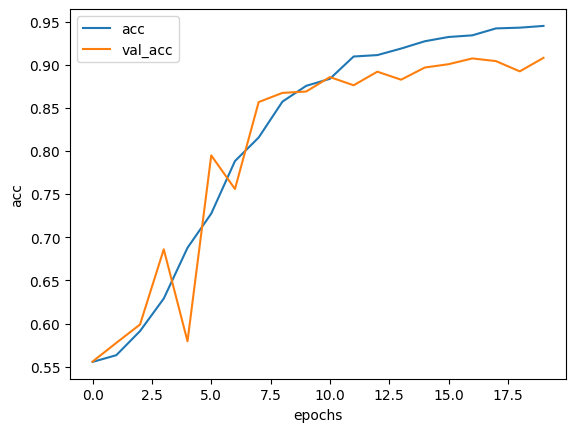

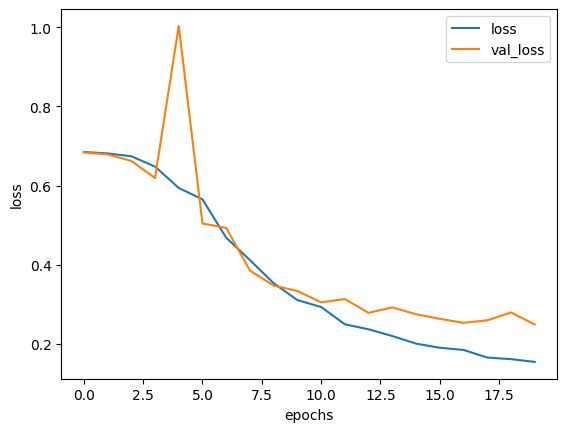

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

In [ ]:
from keras import layers
with tf.device('/gpu:0'):
    model = Sequential()
    model.add(layers.Embedding(max_words, 32, input_length=max_sen_len))
    model.add(layers.Conv1D(32, 8, activation='relu'))
    model.add(layers.MaxPooling1D(4))
    model.add(layers.Conv1D(32, 3, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(1, activation='sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(train_pad,labels, epochs=15, batch_size=32, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 52, 32)            474144    
                                                                 
 conv1d (Conv1D)             (None, 45, 32)            8224      
                                                                 
 max_pooling1d (MaxPooling1  (None, 11, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 9, 32)             3104      
                                                                 
 global_max_pooling1d (Glob  (None, 32)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_1 (Dense)             (None, 1)                

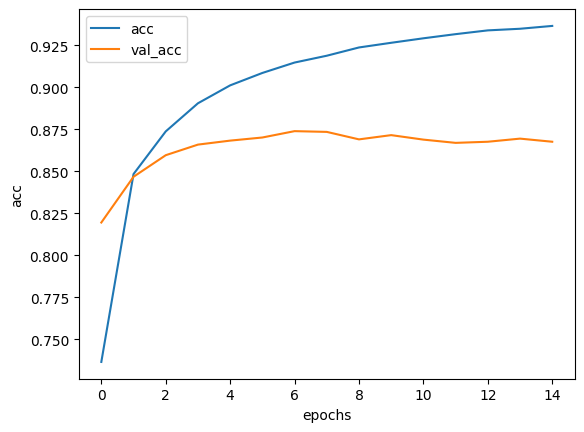

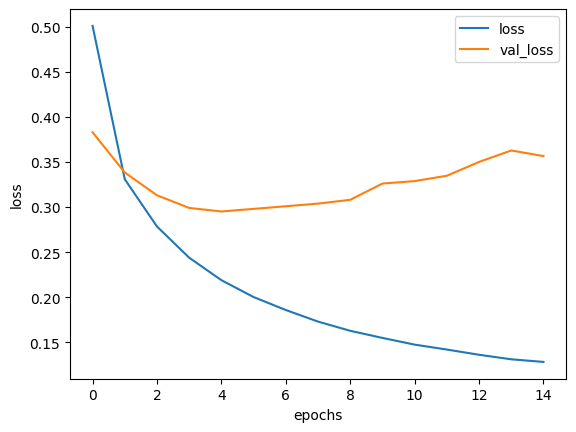

In [ ]:
plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

keras-vis                     0.4.1         
